## Урок 1. Алгоритм линейной регрессии. Градиентный спуск

In [3]:
import numpy as np
import matplotlib.pyplot as plt

__Задача:__ предсказание баллов ЕГЭ ученика в зависимости от кол-ва лет стажа его репетитора

In [4]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2]])
X

array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  1,  2,  5,  3,  0,  5, 10,  1,  2]])

In [3]:
X.shape

(2, 10)

In [8]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

Уравнение прямой: $y = a*x + b$

In [5]:
y_pred1 = 35 * np.ones(10) + X[1]*5
y_pred2 = 40 * np.ones(10) + X[1]*7.5

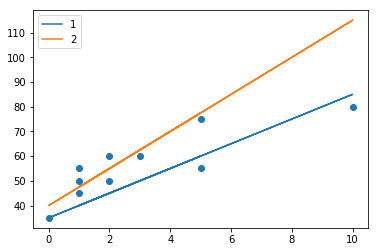

In [6]:
plt.scatter(X[1], y)
plt.plot(X[1], y_pred1, label='1')
plt.plot(X[1], y_pred2, label='2')
plt.legend()
plt.show()

Простая ошибка

In [7]:
err1 = np.sum(y - y_pred1)
err2 = np.sum(y - y_pred2)
err1, err2

(65.0, -60.0)

MAE (Mean Absolute Error)

In [8]:
mae_1 = np.sum(np.abs(y - y_pred1)) / 10
mae_2 = np.sum(np.abs(y - y_pred2)) / 10
mae_1, mae_2

(8.5, 9.0)

MSE (Mean Squared Error)

In [9]:
mse_1 = np.mean((y - y_pred1)**2)
mse_2 = np.mean((y - y_pred2)**2)
mse_1, mse_2

(97.5, 188.75)

Метод наименьших квадратов (МНК)

In [10]:
X.shape

(2, 10)

In [11]:
X.T.shape

(10, 2)

In [14]:
all(X @ y == np.dot(X,y))

True

In [15]:
W = np.linalg.inv(np.dot(X, X.T)) @ X @ y
W

array([45.0625,  3.8125])

In [35]:
y_pred3 = W[0] * X[0] + W[1] * X[1]

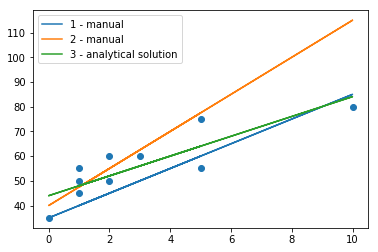

In [36]:
plt.scatter(X[1], y)
plt.plot(X[1], y_pred1, label='1 - manual')
plt.plot(X[1], y_pred2, label='2 - manual')
plt.plot(X[1], y_pred3, label='3 - analytical solution')
plt.legend()
plt.show()

In [6]:
def calc_mae(y, y_pred):
    err = np.mean(np.abs(y - y_pred))
    return err

def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2) # <=> 1/n * np.sum((y_pred - y)**2)
    return err

In [20]:
calc_mae(y, y_pred1), calc_mse(y, y_pred1)

(8.5, 97.5)

In [21]:
calc_mae(y, y_pred2), calc_mse(y, y_pred2)

(9.0, 188.75)

In [22]:
calc_mae(y, y_pred3), calc_mse(y, y_pred3)

(5.7875, 43.96875)

Градиентный спуск

In [24]:
n = 10
Q = 1/n * np.sum((y_pred3 - y)**2) # функционал ошибки, y = X*w

In [25]:
alpha = 1e-2 # величина шага
g = alpha * (1/n * 2 * np.sum(X[0] * (W[0] * X[0] - y)))

In [26]:
W[0], W[0] - g

(45.0625, 45.29125)

### Д/З

1. Подберите скорость обучения (alpha) и количество итераций


*3: вместо того, чтобы задавать количество итераций, задайте условие остановки алгоритма - когда ошибка за итерацию начинает изменяться ниже определенного порога (упрощенный аналог параметра tol в линейной регрессии в sklearn).

In [24]:
n = X.shape[1]
# alpha = 1e-2
# W = np.array([1, 0.5])

eps = 0.0001 # Порог изменения ошибки за итерацию для остановки алгоритма
iter_calc = []
alpha_choice = [1e-3, 5e-3, 1e-2, 2e-2, 5e-2, 1e-1] # варианты альфа для выбора

# максимальное число итераций
max_iter = 1e4


for alpha in alpha_choice:
    itersum = 0
    W = np.array([1.0, 0.5])
    new_W = np.array([0.0, 0.0])

    # зададим начальную разницу весов большим числом
    weight_dist = np.inf

    print('- ' *10)
    print(f'Number of objects = {n} \
           \nLearning rate = {alpha} \
           \nInitial weights = {W} \n')

    # ход градиентного спуска
    while weight_dist > eps and itersum < max_iter:

        #    for i in range(100):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        for k in range(W.shape[0]):

            new_W[k] = W[k] - alpha * ( 1 /n * 2 * np.sum(X[k] * (y_pred - y)))
        if itersum % 50 == 0:
            print(f'Iteration #{itersum}: W_new = {W}, MSE = {round(err,2)}')
        weight_dist = np.linalg.norm(new_W - W, ord=2)

        itersum += 1
        W = new_W.copy()
    iter_calc.append(itersum)
    print(f'Alpha = {alpha}, FINAL Iteration #{itersum}: W_new = {W}, MSE = {round(err,2)}')
print(f'\n\nAlpha to check: {alpha_choice}')
print(f'Number of iterations: {iter_calc}')
print(f'\n\n Best iteration number = {min(iter_calc)}, best alpha = {alpha_choice[iter_calc.index(min(iter_calc))]}')

- - - - - - - - - - 
Number of objects = 10            
Learning rate = 0.001            
Initial weights = [1.  0.5] 

Iteration #0: W_new = [1.  0.5], MSE = 3047.75
Iteration #50: W_new = [4.52813991 9.26798796], MSE = 866.15
Iteration #100: W_new = [ 6.59783995 10.46982437], MSE = 740.51
Iteration #150: W_new = [ 8.35712041 10.41520311], MSE = 678.25
Iteration #200: W_new = [10.00137862 10.16136654], MSE = 622.9
Iteration #250: W_new = [11.56618027  9.88504454], MSE = 572.41
Iteration #300: W_new = [13.06017121  9.61537801], MSE = 526.33
Iteration #350: W_new = [14.48736464  9.35678732], MSE = 484.27
Iteration #400: W_new = [15.85088284  9.10956933], MSE = 445.87
Iteration #450: W_new = [17.15358947  8.87334944], MSE = 410.83
Iteration #500: W_new = [18.39820047  8.6476594 ], MSE = 378.84
Iteration #550: W_new = [19.58730734  8.43203337], MSE = 349.63
Iteration #600: W_new = [20.72338541  8.22602316], MSE = 322.98
Iteration #650: W_new = [21.80879954  8.02920005], MSE = 298.65
Itera

Iteration #1100: W_new = [44.78665057  3.86252104], MSE = 44.0
Iteration #1150: W_new = [44.84300364  3.85230228], MSE = 43.99
Iteration #1200: W_new = [44.88784439  3.8441711 ], MSE = 43.98
Iteration #1250: W_new = [44.92352465  3.83770104], MSE = 43.98
Iteration #1300: W_new = [44.95191582  3.83255274], MSE = 43.97
Iteration #1350: W_new = [44.97450698  3.82845618], MSE = 43.97
Iteration #1400: W_new = [44.99248301  3.8251965 ], MSE = 43.97
Iteration #1450: W_new = [45.00678673  3.82260274], MSE = 43.97
Iteration #1500: W_new = [45.01816835  3.82053886], MSE = 43.97
Iteration #1550: W_new = [45.02722483  3.81889661], MSE = 43.97
Iteration #1600: W_new = [45.03443117  3.81758985], MSE = 43.97
Iteration #1650: W_new = [45.04016533  3.81655005], MSE = 43.97
Alpha = 0.005, FINAL Iteration #1659: W_new = [45.04106539  3.81638684], MSE = 43.97
- - - - - - - - - - 
Number of objects = 10            
Learning rate = 0.01            
Initial weights = [1.  0.5] 

Iteration #0: W_new = [1.  0.

C:\Users\LMAXL\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in square
  


*2. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее

In [23]:
n = X.shape[1]
alpha = 1e-2
W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {alpha} \
       \nInitial weights = {W} \n')

for i in range(1001):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
#     for k in range(W.shape[0]):
#         W[k] -= alpha * (1/n * 2 * np.sum(X[k] * (y_pred - y)))
#     W -= alpha * (1/n * 2 * np.sum (X * (y_pred - y)))
    W -= alpha * (1/n * 2 * np.dot (X, (y_pred - y).T))
    if i % 100 == 0:
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')

Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [2.08 4.27], MSE = 3047.75
Iteration #100: W_new = [28.38281518  6.83710367], MSE = 177.43
Iteration #200: W_new = [38.38986469  5.02247953], MSE = 65.33
Iteration #300: W_new = [42.39314129  4.29654705], MSE = 47.39
Iteration #400: W_new = [43.99463466  4.00614091], MSE = 44.52
Iteration #500: W_new = [44.63530512  3.8899652 ], MSE = 44.06
Iteration #600: W_new = [44.89160255  3.84348962], MSE = 43.98
Iteration #700: W_new = [44.99413322  3.82489726], MSE = 43.97
Iteration #800: W_new = [45.03515017  3.81745947], MSE = 43.97
Iteration #900: W_new = [45.05155882  3.81448401], MSE = 43.97
Iteration #1000: W_new = [45.05812303  3.8132937 ], MSE = 43.97
